# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
#There is no difference between the new and old email template response rates.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
#There is a significant difference between old and new email template response rates.
#What we want: there is a 1% difference in performance of the new template over the old template.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [6]:
# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')

power_analysis = TTestIndPower()

In [3]:
m1 = 0.05
m2 = 0.06
s = 0.0475

d = (m1 - m2)/s

In [4]:
power_analysis.solve_power(effect_size= d, alpha=.05, power=.8)

355.14275443426556

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [24]:
def cohens_d(m1, m2, s):
    d = (m1 - m2)/s
    return d

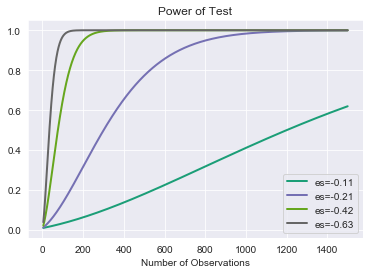

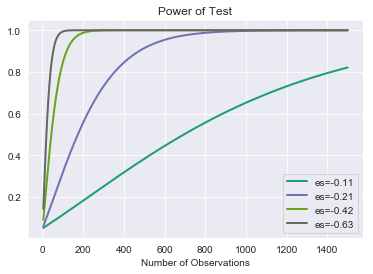

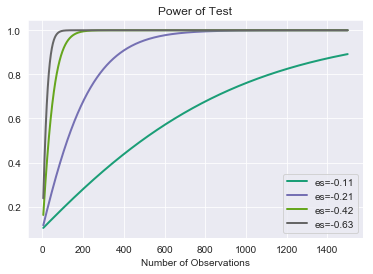

In [27]:
#Your code; plot power curves for the various alpha and effect size combinations

alpha_list = [0.01, 0.05, 0.1]
response_rates = [.005, .01, .02, .03]

for alpha in alpha_list:
    power_analysis.plot_power(dep_var='nobs',
                              nobs = np.array(range(5,1500)),
                              effect_size=np.array([cohens_d(m1,(m1+ x), s) for x in response_rates]),
                              alpha=alpha)
plt.show()


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
#To avoid a false negative and be able to confidently reject the null hypothesis that there is no difference between
#the email templates, we would like a power of at least 0.8. To confidently determine a 1% difference in response 
#rate, we would need to send approximately 355 emails with the new template. We could be more confident, but we
#would need to either send more emails to see a smaller percent change, or we could send fewer emails to see a larger
#percent change. However, the percent change we're able to detect could be positive or negative. If we want to ensure
#that we're not losing too much business, we should test the new template on 355 emails and then observe the potential
#direction of change. 

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.